1. Consider a region, get kendall coefficient for the first phase according to phases we have set.
2. Do the same for all the regions and store the kendall coefficients accordingly. 
3. Plot the Italy map, first phase for all the mobility categories. 

In [1]:
import pandas as pd   
import numpy as np   
import random 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Importing Incidence dataset

In [2]:
df_regionInc = pd.read_csv("covid19dh.csv", dtype = {"Province/State":str, "Country/Region":str})
# cols 7 and 8 were giving me errors, so dtype str is used on them.
df_regionInc

,ObservationDate,Tests,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,...,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
0,2020-01-01,0,0.0,0,0,37172386.0,AFG,NaN,Afghanistan,0,...,0,0,0,0,0,0,0,0,0,0.00
1,2020-01-02,0,0.0,0,0,37172386.0,AFG,NaN,Afghanistan,0,...,0,0,0,0,0,0,0,0,0,0.00
2,2020-01-03,0,0.0,0,0,37172386.0,AFG,NaN,Afghanistan,0,...,0,0,0,0,0,0,0,0,0,0.00
3,2020-01-04,0,0.0,0,0,37172386.0,AFG,NaN,Afghanistan,0,...,0,0,0,0,0,0,0,0,0,0.00
4,2020-01-05,0,0.0,0,0,37172386.0,AFG,NaN,Afghanistan,0,...,0,0,0,0,0,0,0,0,0,0.00
5,2020-01-06,0,0.0,0,0,37172386.0,AFG,NaN,Afghanistan,0,...,0,0,0,0,0,0,0,0,0,0.00
6,2020-01-07,0,0.0,0,0,37172386.0,AFG,NaN,Afghanistan,0,...,0,0,0,0,0,0,0,0,0,0.00
7,2020-01-08,0,0.0,0,0,37172386.0,AFG,NaN,Afghanistan,0,...,0,0,0,0,0,0,0,0,0,0.00
8,2020-01-09,0,0.0,0,0,37172386.0,AFG,NaN,Afghanistan,0,...,0,0,0,0,0,0,0,0,0,0.00
9,2020-01-10,0,0.0,0,0,37172386.0,AFG,NaN,Afghanistan,0,...,0,0,0,0,0,0,0,0,0,0.00


In [3]:
df_italyInc = df_regionInc[df_regionInc.ISO3=="ITA"]
df_italyInc

,ObservationDate,Tests,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,...,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
33968,2020-01-01,0,0.0,0,0,60421760.0,ITA,NaN,Italy,0,...,0,0,0,0,0,0,0,0,0,0.00
33969,2020-01-02,0,0.0,0,0,60421760.0,ITA,NaN,Italy,0,...,0,0,0,0,0,0,0,0,0,0.00
33970,2020-01-03,0,0.0,0,0,60421760.0,ITA,NaN,Italy,0,...,0,0,0,0,0,0,0,0,0,0.00
33971,2020-01-04,0,0.0,0,0,60421760.0,ITA,NaN,Italy,0,...,0,0,0,0,0,0,0,0,0,0.00
33972,2020-01-05,0,0.0,0,0,60421760.0,ITA,NaN,Italy,0,...,0,0,0,0,0,0,0,0,0,0.00
33973,2020-01-06,0,0.0,0,0,60421760.0,ITA,NaN,Italy,0,...,0,0,0,0,0,0,0,0,0,0.00
33974,2020-01-07,0,0.0,0,0,60421760.0,ITA,NaN,Italy,0,...,0,0,0,0,0,0,0,0,0,0.00
33975,2020-01-08,0,0.0,0,0,60421760.0,ITA,NaN,Italy,0,...,0,0,0,0,0,0,0,0,0,0.00
33976,2020-01-09,0,0.0,0,0,60421760.0,ITA,NaN,Italy,0,...,0,0,0,0,0,0,0,0,0,0.00
33977,2020-01-10,0,0.0,0,0,60421760.0,ITA,NaN,Italy,0,...,0,0,0,0,0,0,0,0,0,0.00


In [4]:
df_italyInc = df_italyInc.dropna() # drop all the NaN's in case if they are there. 

In [5]:
df_italyInc.drop( df_italyInc[ df_italyInc['Province/State'] =='P.A. Trento' ].index , inplace=True)
df_italyInc.drop( df_italyInc[ df_italyInc['Province/State'] =='P.A. Bolzano' ].index , inplace=True)


C:\Users\camilla\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [6]:
Infected = df_italyInc['Confirmed'] -  df_italyInc['Recovered'] -  df_italyInc['Deaths']

In [7]:
df_italyInc.insert(3,"Infected",Infected)   

In [8]:
df_italyInc['Infected'] = df_italyInc['Infected'].rolling(7).mean()

C:\Users\camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
# Consider only these 3 cols
df_italyInc = df_italyInc.filter(["ObservationDate","Infected", "Province/State"], axis=1)
df_italyInc

,ObservationDate,Infected,Province/State
85692,2020-01-01,NaN,Friuli Venezia Giulia
85693,2020-01-02,NaN,Friuli Venezia Giulia
85694,2020-01-03,NaN,Friuli Venezia Giulia
85695,2020-01-04,NaN,Friuli Venezia Giulia
85696,2020-01-05,NaN,Friuli Venezia Giulia
85697,2020-01-06,NaN,Friuli Venezia Giulia
85698,2020-01-07,0.000000,Friuli Venezia Giulia
85699,2020-01-08,0.000000,Friuli Venezia Giulia
85700,2020-01-09,0.000000,Friuli Venezia Giulia
85701,2020-01-10,0.000000,Friuli Venezia Giulia


In [10]:
# check the list of provinces
region_namesInc = list(df_italyInc["Province/State"].unique())
region_namesInc

['Friuli Venezia Giulia',
 'Molise',
 'Campania',
 'Veneto',
 'Basilicata',
 'Lazio',
 'Lombardia',
 'Piemonte',
 "Valle d'Aosta",
 'Sicilia',
 'Marche',
 'Calabria',
 'Liguria',
 'Umbria',
 'Emilia-Romagna',
 'Abruzzo',
 'Puglia',
 'Toscana',
 'Sardegna']

In [11]:
#df_oneProvince = df_region[df_region["Province/State"]==provinces[0]]
#df_oneProvince

In [12]:
# introducing lag of 5 days due to incubation period. 
#df_1proPhase1 = df_oneProvince[df_oneProvince["ObservationDate"].between("2020-02-29","2021-01-15")]

In [13]:
#I_ph1 = df_1proPhase1["Confirmed"]

In [14]:
#I_ph1

# Importing Mobility dataset

In [15]:
file = '2020_IT_Region_Mobility_Report.csv'
data = pd.read_csv(file,sep=',')
df_italyMob = pd.DataFrame(data)
#data_df = data_df.head(n=329) # we want only national data

In [16]:
# get the names from of the regions from the mobility dataset
region_namesMob = list(df_italyMob["sub_region_1"].dropna().unique())
region_namesMob

['Abruzzo',
 'Aosta',
 'Apulia',
 'Basilicata',
 'Calabria',
 'Campania',
 'Emilia-Romagna',
 'Friuli-Venezia Giulia',
 'Lazio',
 'Liguria',
 'Lombardy',
 'Marche',
 'Molise',
 'Piedmont',
 'Sardinia',
 'Sicily',
 'Trentino-South Tyrol',
 'Tuscany',
 'Umbria',
 'Veneto']

In [17]:
region_namesInc

['Friuli Venezia Giulia',
 'Molise',
 'Campania',
 'Veneto',
 'Basilicata',
 'Lazio',
 'Lombardia',
 'Piemonte',
 "Valle d'Aosta",
 'Sicilia',
 'Marche',
 'Calabria',
 'Liguria',
 'Umbria',
 'Emilia-Romagna',
 'Abruzzo',
 'Puglia',
 'Toscana',
 'Sardegna']

In [18]:
# clearly, there exists slight differences between the region names as obtained from Incidence data and as obtained
# from mobility data. So, what we do is, since mobility data is International, if the names are slightly 
# different in Incidence data region names, we replace it with names from Mobility data as seen above.

In [19]:
# create a dictionary to replace the names.
replace_dict = {"Friuli-Venezia Giulia":"Friuli Venezia Giulia",'Lombardy':'Lombardia','Trentino-South Tyrol':'P.A. Trento',
               'Piedmont':'Piemonte','Aosta':"Valle d'Aosta",'Sicily': 'Sicilia','Apulia':'Puglia','Tuscany':'Toscana',
               'Sardinia':'Sardegna'}

In [20]:
#df_italyInc

In [21]:
# Replace to correct names of regions as seen in above incidence data.
for i in range(len(replace_dict.keys())):
    df_italyMob["sub_region_1"].replace(list(replace_dict.keys())[i],list(replace_dict.values())[i], inplace=True)

In [22]:
# As you can visually see below in last 5 rows, Sardegna has been changed to Sardinia. 
#df_italyInc

# Cleaning and filtering mobility data

In [23]:
#mob = data_df[data_df['date'].between('2020-02-24', '2021-01-20')] # this this the range of dates we are interested in
#mob

In [24]:
#df_italyMob

In [25]:
# Here we come up with logic that, we consider only those rows that have NaN's in sub_region_2
remove_province_data = (np.array(df_italyMob['sub_region_2'].isnull()))
df_italyMob = df_italyMob[remove_province_data]
#df_italyMob

In [26]:
# Now we drop the columns that we don't require for mobility analysis.
df_italyMob=df_italyMob.drop(['country_region_code', 'country_region', 'sub_region_2','metro_area','iso_3166_2_code',
        'census_fips_code'], axis=1)
#df_italyMob

In [27]:
# now we drop the whole row itself if there exists NaN anywhere in df.
df_italyMob = df_italyMob.dropna()
#df_italyMob

In [28]:
#df_italyMob = df_italyMob[~df_italyMob['sub_region_1'].str.contains('Trentino-South Tyrol',na=False)]
df_italyMob.drop( df_italyMob[ df_italyMob['sub_region_1'] =='Trentino-South Tyrol' ].index , inplace=True)

In [29]:
df_italyMob['retail_and_recreation_percent_change_from_baseline'] = df_italyMob['retail_and_recreation_percent_change_from_baseline'].rolling(7).mean()
df_italyMob['parks_percent_change_from_baseline'] = df_italyMob['parks_percent_change_from_baseline'].rolling(7).mean()
df_italyMob['transit_stations_percent_change_from_baseline'] = df_italyMob['transit_stations_percent_change_from_baseline'].rolling(7).mean()
df_italyMob['workplaces_percent_change_from_baseline'] = df_italyMob['workplaces_percent_change_from_baseline'].rolling(7).mean()
df_italyMob['residential_percent_change_from_baseline'] = df_italyMob['residential_percent_change_from_baseline'].rolling(7).mean()
df_italyMob['grocery_and_pharmacy_percent_change_from_baseline'] = df_italyMob['grocery_and_pharmacy_percent_change_from_baseline'].rolling(7).mean() 

In [30]:
df_italyMob[df_italyMob["sub_region_1"]=="Valle d'Aosta"]

,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2142,Valle d'Aosta,2020-02-15,-25.142857,-6.285714,-3.285714,-23.714286,-18.714286,6.571429
2143,Valle d'Aosta,2020-02-16,-15.857143,-0.857143,3.285714,-14.714286,-15.142857,5.000000
2144,Valle d'Aosta,2020-02-17,-10.857143,1.142857,6.428571,-10.000000,-11.857143,4.000000
2145,Valle d'Aosta,2020-02-18,-5.571429,2.571429,10.285714,-5.000000,-8.142857,2.857143
2146,Valle d'Aosta,2020-02-19,-1.428571,4.000000,10.857143,-1.142857,-4.857143,1.857143
2147,Valle d'Aosta,2020-02-20,4.000000,5.142857,16.142857,3.714286,-1.857143,0.714286
2148,Valle d'Aosta,2020-02-21,9.571429,6.571429,21.428571,9.571429,1.285714,-0.571429
2149,Valle d'Aosta,2020-02-22,9.714286,7.285714,22.285714,11.285714,1.285714,-0.571429
2150,Valle d'Aosta,2020-02-23,11.000000,10.714286,26.428571,14.428571,1.428571,-1.000000
2151,Valle d'Aosta,2020-02-24,14.285714,15.142857,33.285714,16.428571,-1.285714,-0.571429


In [31]:
df_italyInc[df_italyInc["Province/State"]=="Valle d'Aosta"]

,ObservationDate,Infected,Province/State
284868,2020-01-01,12655.000000,Valle d'Aosta
284869,2020-01-02,10539.857143,Valle d'Aosta
284870,2020-01-03,8380.714286,Valle d'Aosta
284871,2020-01-04,6237.857143,Valle d'Aosta
284872,2020-01-05,4125.142857,Valle d'Aosta
284873,2020-01-06,2062.571429,Valle d'Aosta
284874,2020-01-07,0.000000,Valle d'Aosta
284875,2020-01-08,0.000000,Valle d'Aosta
284876,2020-01-09,0.000000,Valle d'Aosta
284877,2020-01-10,0.000000,Valle d'Aosta


# For now we have the two required cleaned and filtered datasets for Incidence and mobility

In [32]:
df_italyInc

,ObservationDate,Infected,Province/State
85692,2020-01-01,NaN,Friuli Venezia Giulia
85693,2020-01-02,NaN,Friuli Venezia Giulia
85694,2020-01-03,NaN,Friuli Venezia Giulia
85695,2020-01-04,NaN,Friuli Venezia Giulia
85696,2020-01-05,NaN,Friuli Venezia Giulia
85697,2020-01-06,NaN,Friuli Venezia Giulia
85698,2020-01-07,0.000000,Friuli Venezia Giulia
85699,2020-01-08,0.000000,Friuli Venezia Giulia
85700,2020-01-09,0.000000,Friuli Venezia Giulia
85701,2020-01-10,0.000000,Friuli Venezia Giulia


In [33]:
df_italyMob

,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
357,Abruzzo,2020-02-15,NaN,NaN,NaN,NaN,NaN,NaN
358,Abruzzo,2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN
359,Abruzzo,2020-02-17,NaN,NaN,NaN,NaN,NaN,NaN
360,Abruzzo,2020-02-18,NaN,NaN,NaN,NaN,NaN,NaN
361,Abruzzo,2020-02-19,NaN,NaN,NaN,NaN,NaN,NaN
362,Abruzzo,2020-02-20,NaN,NaN,NaN,NaN,NaN,NaN
363,Abruzzo,2020-02-21,0.285714,2.857143,15.285714,8.571429,0.571429,-0.857143
364,Abruzzo,2020-02-22,0.142857,3.428571,15.000000,8.428571,0.571429,-0.714286
365,Abruzzo,2020-02-23,0.142857,4.714286,16.000000,7.571429,1.142857,-0.714286
366,Abruzzo,2020-02-24,1.000000,7.142857,18.000000,6.857143,-0.428571,-0.428571


In [36]:
mobility_list = ['retail_and_recreation_percent_change_from_baseline',
'parks_percent_change_from_baseline',
'transit_stations_percent_change_from_baseline',
'workplaces_percent_change_from_baseline',
'residential_percent_change_from_baseline',
'grocery_and_pharmacy_percent_change_from_baseline'] 


regions_list= ['Piemonte',
 "Valle d'Aosta",
 'Lombardia',
 'Veneto',
 'Friuli Venezia Giulia',
 'Liguria',
 'Emilia-Romagna',
 'Toscana',
 'Umbria',
 'Marche',
 'Lazio',
 'Abruzzo',
 'Molise',
 'Campania',
 'Puglia',
 'Basilicata',
 'Calabria',
 'Sicilia',
 'Sardegna']

In [86]:
regions_list

['Piemonte',
 "Valle d'Aosta",
 'Lombardia',
 'Veneto',
 'Friuli Venezia Giulia',
 'Liguria',
 'Emilia-Romagna',
 'Toscana',
 'Umbria',
 'Marche',
 'Lazio',
 'Abruzzo',
 'Molise',
 'Campania',
 'Puglia',
 'Basilicata',
 'Calabria',
 'Sicilia',
 'Sardegna']

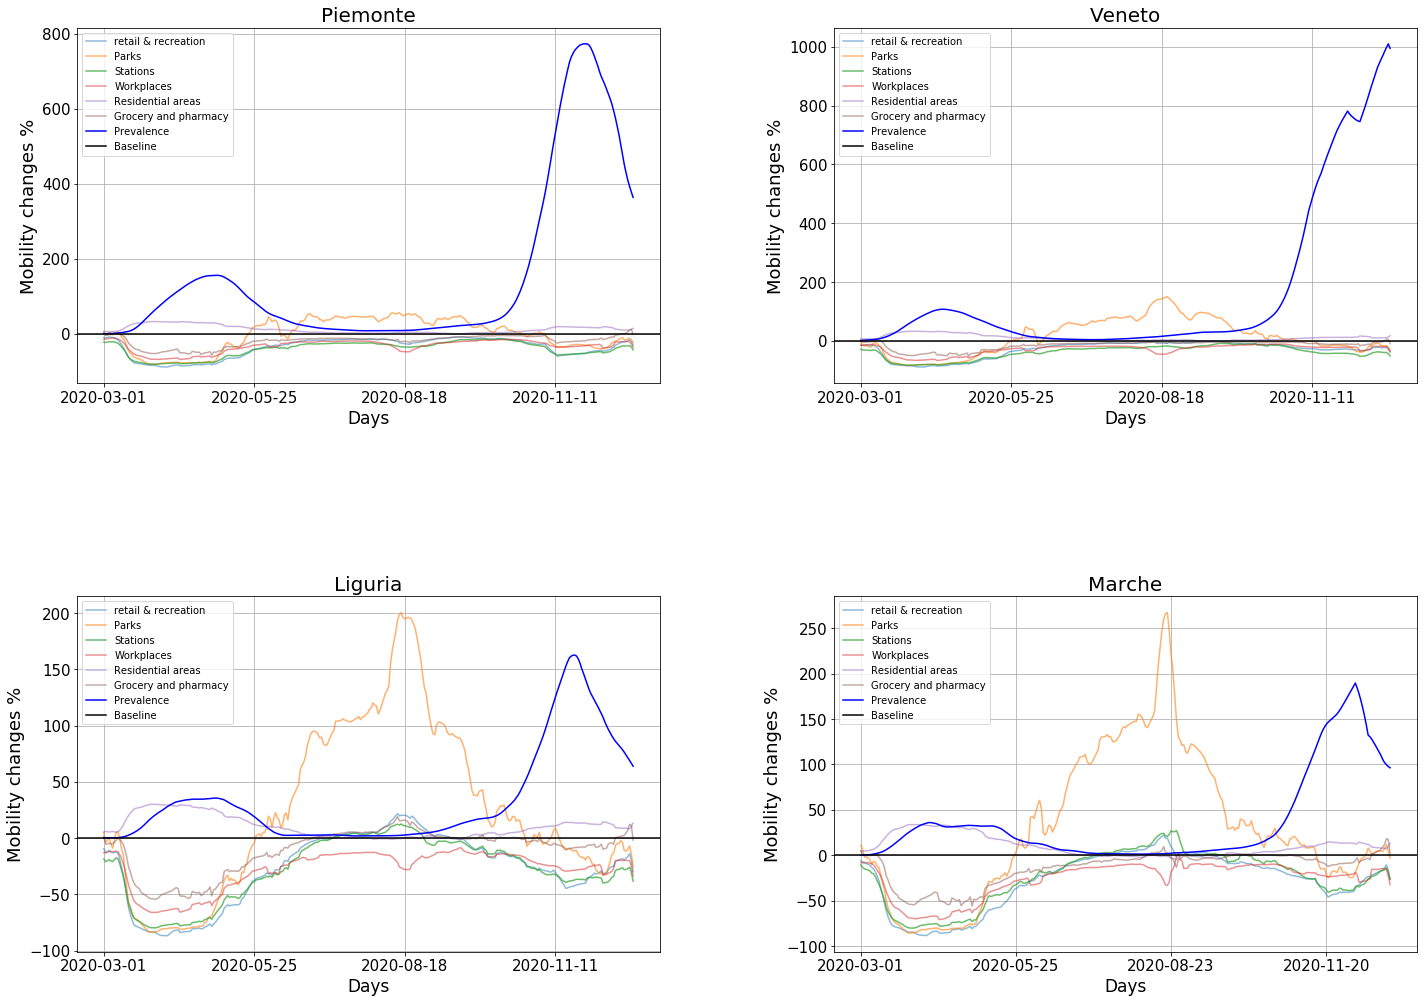

In [99]:
fig, axs = plt.subplots(2,2, figsize=(24, 17))
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
axs = axs.ravel()
for b,i in enumerate(['Piemonte',

 'Veneto',
 'Liguria',


 'Marche']):
        reg_mob = df_italyMob[df_italyMob['sub_region_1']==i] 
        reg_inc = df_italyInc[df_italyInc['Province/State']==i] 
        reg_inc = reg_inc[reg_inc['ObservationDate'].between('2020-03-01','2020-12-25')]
        reg_mob = reg_mob[reg_mob['date'].between('2020-03-01','2020-12-25')] 

        idx1 = pd.Index(reg_inc['ObservationDate'])
        idx2 = pd.Index(reg_mob['date'])
               # len(reg_inc)==len(reg_mob)
        missing_dates = idx1.difference(idx2) 
        #print(missing_dates)
        for w in range(len(missing_dates)):
            reg_inc = reg_inc[reg_inc.ObservationDate != missing_dates[w]]
               # len(reg_inc)==len(reg_mob)
        missing_dates2 = idx2.difference(idx1) 
        #print(missing_dates2)
        for q in range(len(missing_dates2)):
            reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
        #print(len(reg_inc))
        #print(len(reg_mob))


        y1 = reg_mob['retail_and_recreation_percent_change_from_baseline']
        y2 = reg_mob['parks_percent_change_from_baseline']
        y3 = reg_mob['transit_stations_percent_change_from_baseline']
        y4 = reg_mob['workplaces_percent_change_from_baseline']
        y5 = reg_mob['residential_percent_change_from_baseline']
        y6 = reg_mob['grocery_and_pharmacy_percent_change_from_baseline'] 
        x = reg_mob['date'] 

       # fig, ax = plt.subplots(figsize=(9,6))
        pr=reg_inc['Infected']/100
        #y1 = uniform_filter1d(y1, size=N)
        #y2 = uniform_filter1d(y2, size=N)
        #y3 = uniform_filter1d(y3, size=N)
        #y4 = uniform_filter1d(y4, size=N)
        #y5 = uniform_filter1d(y5, size=N)
        #y6 = uniform_filter1d(y6, size=N)
        #ax.plot(x,y1,"o",markersize=2,label='retail & recreation')
        #ax.plot(x,y2,"ro",markersize=2,label='Parks')
        #ax.plot(x,y3,"yo",markersize=2,label='Stations')
        #ax.plot(x,y4,"o",markersize=2,label='Workplaces')
        axs[b].plot(x,y1,label='retail & recreation',alpha=0.5)  #,linestyle="solid", marker="o",markersize=2)
        axs[b].plot(x,y2,label='Parks',alpha=0.6)
        axs[b].plot(x,y3,label='Stations',alpha=0.7)
        axs[b].plot(x,y4,label='Workplaces',alpha=0.5)
        axs[b].plot(x,y5,label='Residential areas',alpha=0.5)
        axs[b].plot(x,y6,label='Grocery and pharmacy',alpha=0.5)
        axs[b].plot(x,pr,label='Prevalence',color="blue")
        #plt.ylim((-110,230))
        #plt.xticks(rotation=45) 
        axs[b].grid(True, which='both')
        axs[b].set_xlabel('Days',size=17)
        axs[b].set_ylabel('Mobility changes %',size=18)
        axs[b].set_xticks(axs[b].get_xticks()[::85])
        axs[b].tick_params(labelsize=15)
        axs[b].set_title(i,size=20) 
        axs[b].axhline(y=0, color='k', label ='Baseline')
        axs[b].legend(loc="best")



In [100]:
regions_list

['Piemonte',
 "Valle d'Aosta",
 'Lombardia',
 'Veneto',
 'Friuli Venezia Giulia',
 'Liguria',
 'Emilia-Romagna',
 'Toscana',
 'Umbria',
 'Marche',
 'Lazio',
 'Abruzzo',
 'Molise',
 'Campania',
 'Puglia',
 'Basilicata',
 'Calabria',
 'Sicilia',
 'Sardegna']

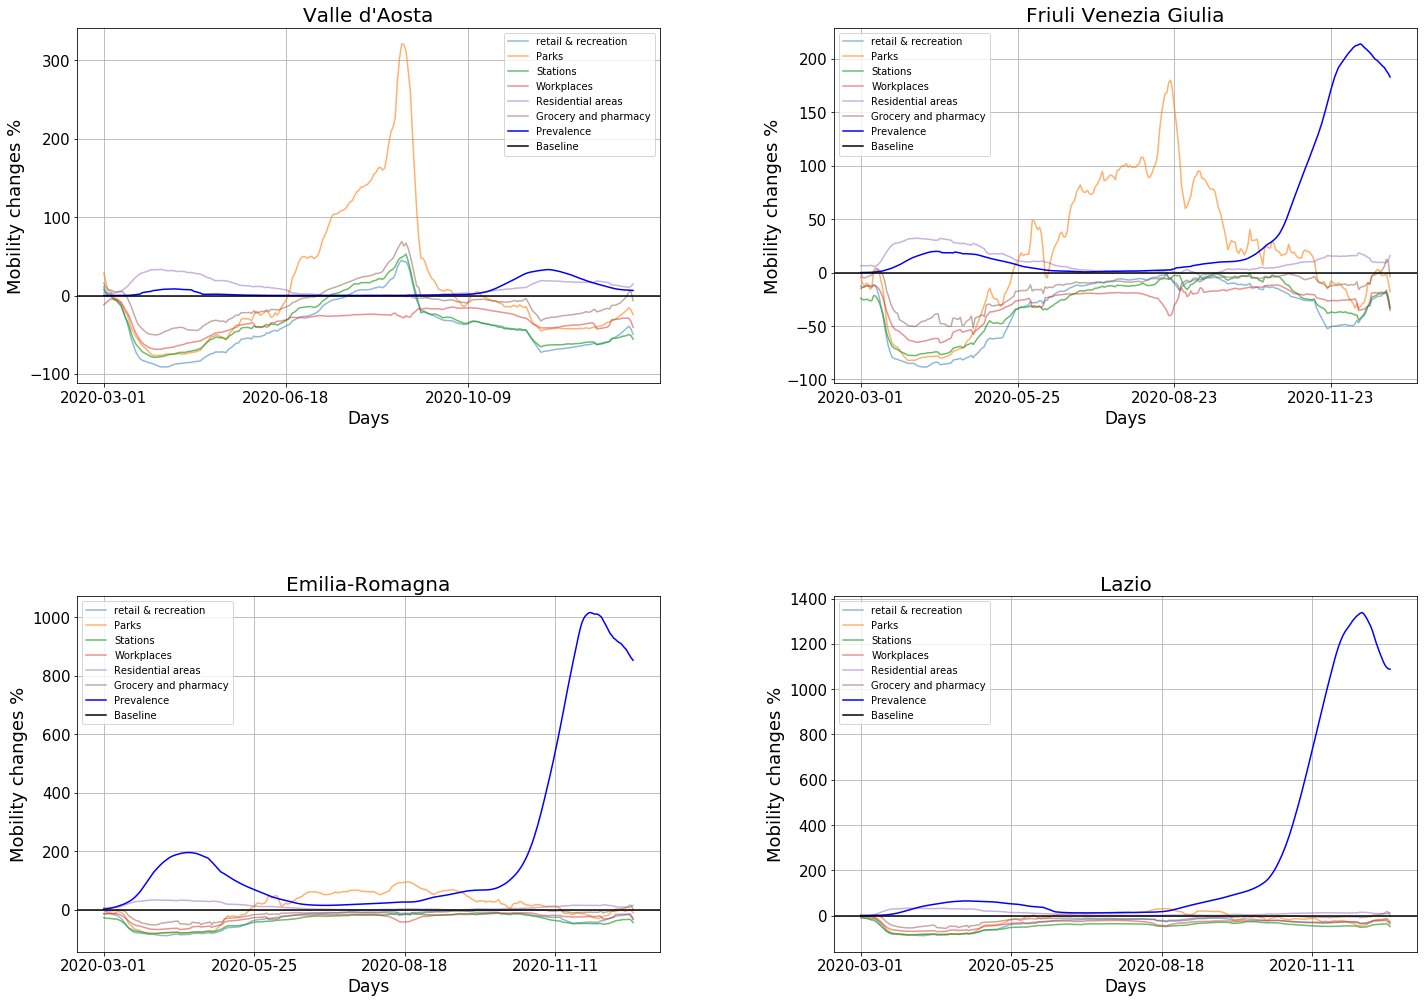

In [114]:
fig, axs = plt.subplots(2,2, figsize=(24, 17))
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
axs = axs.ravel()
for b,i in enumerate([
 "Valle d'Aosta",

 'Friuli Venezia Giulia',
   'Emilia-Romagna',

 'Lazio',

# 'Molise',
 #'Campania',
 #'Puglia',
 #'Basilicata',
  ]):
        reg_mob = df_italyMob[df_italyMob['sub_region_1']==i] 
        reg_inc = df_italyInc[df_italyInc['Province/State']==i] 
        reg_inc = reg_inc[reg_inc['ObservationDate'].between('2020-03-01','2020-12-25')]
        reg_mob = reg_mob[reg_mob['date'].between('2020-03-01','2020-12-25')] 

        idx1 = pd.Index(reg_inc['ObservationDate'])
        idx2 = pd.Index(reg_mob['date'])
               # len(reg_inc)==len(reg_mob)
        missing_dates = idx1.difference(idx2) 
        #print(missing_dates)
        for w in range(len(missing_dates)):
            reg_inc = reg_inc[reg_inc.ObservationDate != missing_dates[w]]
               # len(reg_inc)==len(reg_mob)
        missing_dates2 = idx2.difference(idx1) 
        #print(missing_dates2)
        for q in range(len(missing_dates2)):
            reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
        #print(len(reg_inc))
        #print(len(reg_mob))


        y1 = reg_mob['retail_and_recreation_percent_change_from_baseline']
        y2 = reg_mob['parks_percent_change_from_baseline']
        y3 = reg_mob['transit_stations_percent_change_from_baseline']
        y4 = reg_mob['workplaces_percent_change_from_baseline']
        y5 = reg_mob['residential_percent_change_from_baseline']
        y6 = reg_mob['grocery_and_pharmacy_percent_change_from_baseline'] 
        x = reg_mob['date'] 

       # fig, ax = plt.subplots(figsize=(9,6))
        pr=reg_inc['Infected']/70
        #y1 = uniform_filter1d(y1, size=N)
        #y2 = uniform_filter1d(y2, size=N)
        #y3 = uniform_filter1d(y3, size=N)
        #y4 = uniform_filter1d(y4, size=N)
        #y5 = uniform_filter1d(y5, size=N)
        #y6 = uniform_filter1d(y6, size=N)
        #ax.plot(x,y1,"o",markersize=2,label='retail & recreation')
        #ax.plot(x,y2,"ro",markersize=2,label='Parks')
        #ax.plot(x,y3,"yo",markersize=2,label='Stations')
        #ax.plot(x,y4,"o",markersize=2,label='Workplaces')
        axs[b].plot(x,y1,label='retail & recreation',alpha=0.5)  #,linestyle="solid", marker="o",markersize=2)
        axs[b].plot(x,y2,label='Parks',alpha=0.6)
        axs[b].plot(x,y3,label='Stations',alpha=0.7)
        axs[b].plot(x,y4,label='Workplaces',alpha=0.5)
        axs[b].plot(x,y5,label='Residential areas',alpha=0.5)
        axs[b].plot(x,y6,label='Grocery and pharmacy',alpha=0.5)
        axs[b].plot(x,pr,label='Prevalence',color="blue")
        #plt.ylim((-110,230))
        #plt.xticks(rotation=45) 
        axs[b].grid(True, which='both')
        axs[b].set_xlabel('Days',size=17)
        axs[b].set_ylabel('Mobility changes %',size=18)
        axs[b].set_xticks(axs[b].get_xticks()[::85])
        axs[b].tick_params(labelsize=15)
        axs[b].set_title(i,size=20) 
        axs[b].axhline(y=0, color='k', label ='Baseline')
        axs[b].legend(loc="best")



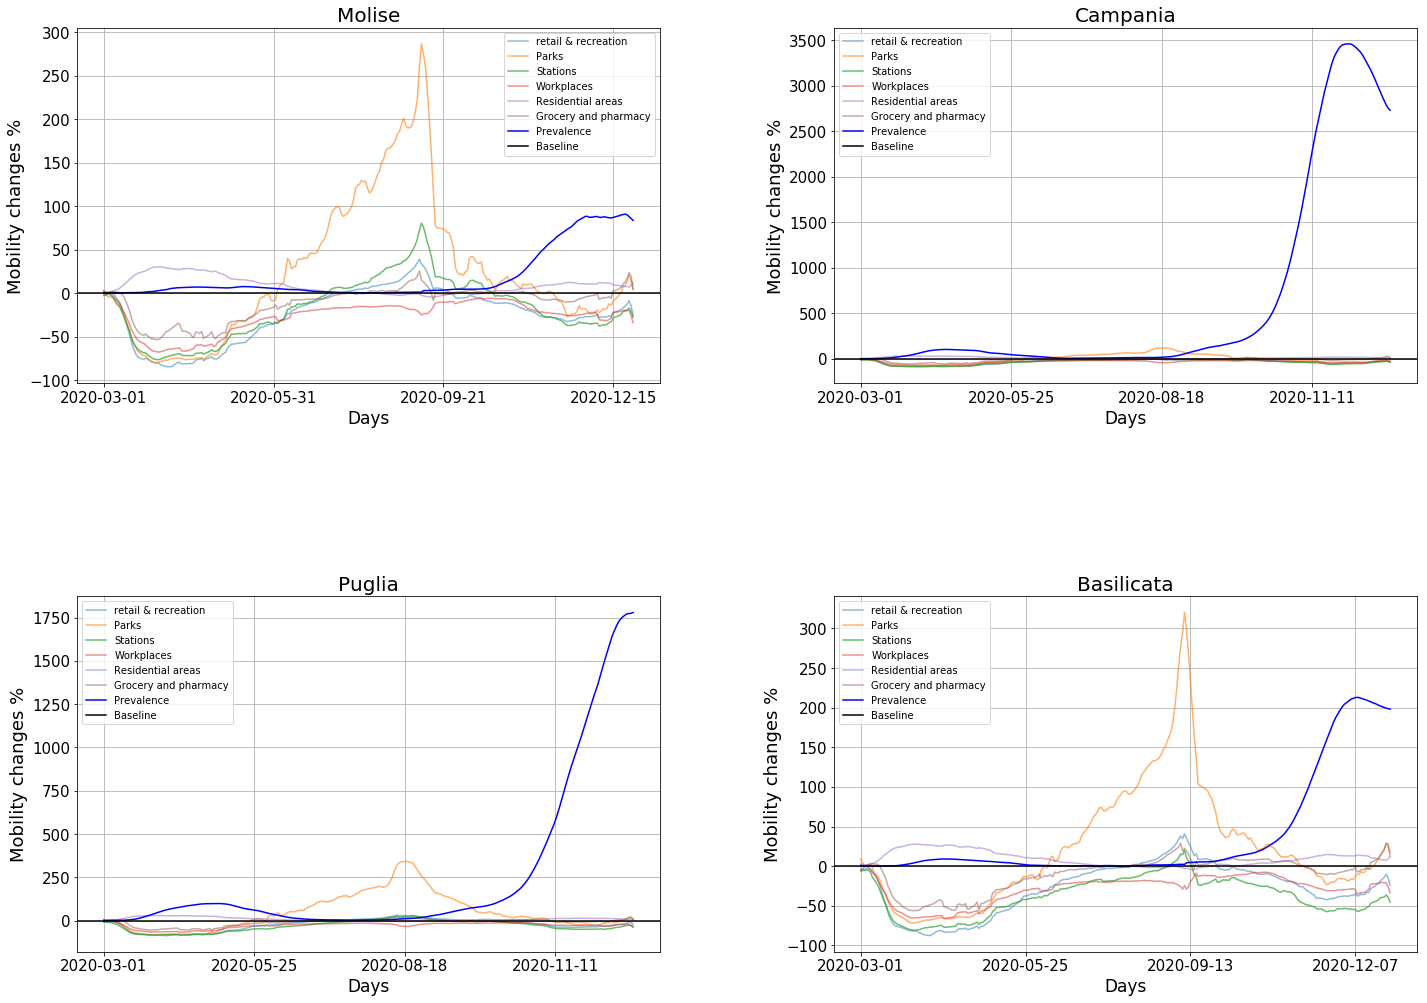

In [118]:
fig, axs = plt.subplots(2,2, figsize=(24, 17))
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
axs = axs.ravel()
for b,i in enumerate([
 'Molise',
 'Campania',
 'Puglia',
 'Basilicata',
  ]):
        reg_mob = df_italyMob[df_italyMob['sub_region_1']==i] 
        reg_inc = df_italyInc[df_italyInc['Province/State']==i] 
        reg_inc = reg_inc[reg_inc['ObservationDate'].between('2020-03-01','2020-12-25')]
        reg_mob = reg_mob[reg_mob['date'].between('2020-03-01','2020-12-25')] 

        idx1 = pd.Index(reg_inc['ObservationDate'])
        idx2 = pd.Index(reg_mob['date'])
               # len(reg_inc)==len(reg_mob)
        missing_dates = idx1.difference(idx2) 
        #print(missing_dates)
        for w in range(len(missing_dates)):
            reg_inc = reg_inc[reg_inc.ObservationDate != missing_dates[w]]
               # len(reg_inc)==len(reg_mob)
        missing_dates2 = idx2.difference(idx1) 
        #print(missing_dates2)
        for q in range(len(missing_dates2)):
            reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
        #print(len(reg_inc))
        #print(len(reg_mob))


        y1 = reg_mob['retail_and_recreation_percent_change_from_baseline']
        y2 = reg_mob['parks_percent_change_from_baseline']
        y3 = reg_mob['transit_stations_percent_change_from_baseline']
        y4 = reg_mob['workplaces_percent_change_from_baseline']
        y5 = reg_mob['residential_percent_change_from_baseline']
        y6 = reg_mob['grocery_and_pharmacy_percent_change_from_baseline'] 
        x = reg_mob['date'] 

       # fig, ax = plt.subplots(figsize=(9,6))
        pr=reg_inc['Infected']/30
        #y1 = uniform_filter1d(y1, size=N)
        #y2 = uniform_filter1d(y2, size=N)
        #y3 = uniform_filter1d(y3, size=N)
        #y4 = uniform_filter1d(y4, size=N)
        #y5 = uniform_filter1d(y5, size=N)
        #y6 = uniform_filter1d(y6, size=N)
        #ax.plot(x,y1,"o",markersize=2,label='retail & recreation')
        #ax.plot(x,y2,"ro",markersize=2,label='Parks')
        #ax.plot(x,y3,"yo",markersize=2,label='Stations')
        #ax.plot(x,y4,"o",markersize=2,label='Workplaces')
        axs[b].plot(x,y1,label='retail & recreation',alpha=0.5)  #,linestyle="solid", marker="o",markersize=2)
        axs[b].plot(x,y2,label='Parks',alpha=0.6)
        axs[b].plot(x,y3,label='Stations',alpha=0.7)
        axs[b].plot(x,y4,label='Workplaces',alpha=0.5)
        axs[b].plot(x,y5,label='Residential areas',alpha=0.5)
        axs[b].plot(x,y6,label='Grocery and pharmacy',alpha=0.5)
        axs[b].plot(x,pr,label='Prevalence',color="blue")
        #plt.ylim((-110,230))
        #plt.xticks(rotation=45) 
        axs[b].grid(True, which='both')
        axs[b].set_xlabel('Days',size=17)
        axs[b].set_ylabel('Mobility changes %',size=18)
        axs[b].set_xticks(axs[b].get_xticks()[::85])
        axs[b].tick_params(labelsize=15)
        axs[b].set_title(i,size=20) 
        axs[b].axhline(y=0, color='k', label ='Baseline')
        axs[b].legend(loc="best")

